In [69]:
# pip install networkx==2.6

In [4]:
import spartan as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [5]:
def plot_graph_new2(Graph, layout=None, bipartite=False, labels=None,
               *args, **kwargs):
    import networkx as nx
    from networkx.algorithms.bipartite.matrix import from_biadjacency_matrix
    nx_layout = {
        None: nx.random_layout,
        'circular': nx.circular_layout,
        'kamada_kawai': nx.kamada_kawai_layout,
        'random': nx.random_layout,
        'shell': nx.shell_layout,
        'spectral': nx.spectral_layout,
        'spring': nx.spring_layout,
        'bipartite': nx.bipartite_layout
    }

    nrow, ncol = Graph.sm.shape
    if bipartite:
        g = from_biadjacency_matrix(Graph.sm)
        # bipartite graph can use other layout, but default is bipartite
        layout = 'bipartite' if layout is None else layout
    else:
        g = nx.from_scipy_sparse_matrix(Graph.sm)

    if layout == 'bipartite':
        pos = nx.bipartite_layout(g, nodes=range(nrow))
    else:
        pos = nx_layout[layout](g)

    fig = plt.figure()
    if bipartite:
        draw_networkx2(g, pos=pos, node_color='r', alpha=0.8)
    else:
        draw_networkx2(g, pos=pos, node_color='r', alpha=0.8)

    if labels != None:
        if isinstance(labels, dict):
            nx.draw_networkx_labels2(g, pos=pos, labels=labels)
        else:
            ldict = dict(zip(range(len(labels)), labels))
            nx.draw_networkx_labels2(g, pos=pos, labels=ldict)

    return fig

In [6]:
fs1_tensor_data = st.loadTensor(path = "./inputData/fs_in_data.csv.gz", header=None)
fs2_tensor_data = st.loadTensor(path = "./inputData/fs_out_data.csv.gz", header=None)

fs1_stensor = fs1_tensor_data.toSTensor(hasvalue=True)
fs2_stensor = fs2_tensor_data.toSTensor(hasvalue=True)

In [7]:
df_1 = pd.DataFrame(fs1_tensor_data.data)
df_2 = pd.DataFrame(fs2_tensor_data.data)

In [12]:
df_1.describe()
# display(df_2.shape)
# display(df_1.shape)

,0,1,2
count,2193.000000,2193.000000,2193.000000
mean,513.068399,2174.733698,8500.231646
std,402.333744,933.647738,15783.053170
min,0.000000,2.000000,0.000000
25%,164.000000,1425.000000,450.000000
50%,404.000000,2435.000000,2000.000000
75%,844.000000,2922.000000,8500.000000
max,1333.000000,3429.000000,280232.000000


In [8]:
df = pd.DataFrame(fs1_tensor_data.data)
# col 0: identifier
# col 1: destination
# col 2: money

display(fs1_tensor_data.data)
display(fs1_stensor._data)
display(len(df[0].unique()))
display(len(df[1].unique()))
display(len(df[2].unique()))

,0,1,2
0,0,3009,1000
1,1,915,937
2,2,3061,0
3,3,55,6000
4,4,939,157
...,...,...,...
2188,1330,2578,7760
2189,1331,2019,4588
2190,1278,2287,4300
2191,1332,3035,600


Format,coo
Data Type,int64
Shape,"(1334, 3430)"
nnz,2006
Density,0.00043841053234315786
Read-only,True
Size,47.0K
Storage ratio,0.00


1334

1896

770

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: >]], dtype=object)

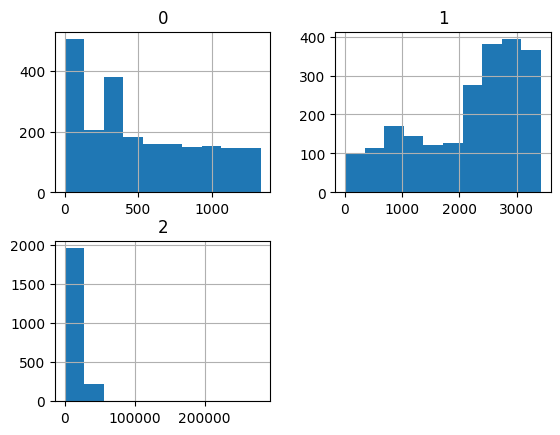

In [9]:
df.hist()

In [10]:
# Change the shape of two stensors, make sure they have the same size in middle dimension

maxshape = max(fs1_stensor.shape[1], fs2_stensor.shape[0])
fs1_stensor.shape = (fs1_stensor.shape[0], maxshape)
fs2_stensor.shape = (maxshape, fs2_stensor.shape[1])

In [11]:
# construct the graphs

graph_1 = st.Graph(fs1_stensor, bipartite=True, weighted=True, modet=None)
graph_2 = st.Graph(fs2_stensor, bipartite=True, weighted=True, modet=None)

display('in',graph_1.get_edgelist_array().shape)
display('out', graph_2.get_edgelist_array().shape)

'in'

(2006, 3)

'out'

(2315, 3)

In [12]:
#Get graph instances from sparse tensors.

step2list = []
step2list.append(graph_1)
step2list.append(graph_2)

In [13]:
# k = number of transactions
# alpha = risk
# maxsize = block size limit.

fs = st.FlowScope(step2list)
res = fs.run(k=100, alpha=4, maxsize=(10,10,10))

you are running with  3  partite graph
this is the cpu version of FlowScope
start  greedy
initial score of g(S): -19063.209800689343
best delete number :  6647
nodes number remaining:  3 0 3 
matrix mass remaining:  0.0 0.0 
best score of g(S):  14313.653846153848
min value of the tree :  (11, 0.0) (0, inf) (250, 0.0) 
the block size is: 10 7 9 

this is the cpu version of FlowScope
start  greedy
initial score of g(S): -19053.298066836505
best delete number :  6658
nodes number remaining:  1 0 4 
matrix mass remaining:  0.0 0.0 
best score of g(S):  11218.333333333332
min value of the tree :  (529, 0.0) (0, inf) (1272, 0.0) 
the block size is: 3 3 9 

this is the cpu version of FlowScope
start  greedy
initial score of g(S): -19030.03371796793
best delete number :  6657
nodes number remaining:  3 0 5 
matrix mass remaining:  0.0 0.0 
best score of g(S):  9077.5625
min value of the tree :  (346, 0.0) (0, inf) (4, 0.0) 
the block size is: 6 3 7 

this is the cpu version of FlowScope
start

In [88]:
ad_model = st.AnomalyDetection.create(step2list, st.ADPolicy.FlowScope, 'flowscope')
res = ad_model.run(k=200,alpha=4,maxsize=(-1,-1,100))

you are running with  3  partite graph
this is the cpu version of FlowScope
start  greedy
initial score of g(S): -19063.209800689343
best delete number :  6647
nodes number remaining:  3 0 3 
matrix mass remaining:  0.0 0.0 
best score of g(S):  14313.653846153848
min value of the tree :  (11, 0.0) (0, inf) (250, 0.0) 
the block size is: 10 7 9 

this is the cpu version of FlowScope
start  greedy
initial score of g(S): -19053.298066836505
best delete number :  6658
nodes number remaining:  1 0 4 
matrix mass remaining:  0.0 0.0 
best score of g(S):  11218.333333333332
min value of the tree :  (529, 0.0) (0, inf) (1272, 0.0) 
the block size is: 3 3 9 

this is the cpu version of FlowScope
start  greedy
initial score of g(S): -19030.03371796793
best delete number :  6657
nodes number remaining:  3 0 5 
matrix mass remaining:  0.0 0.0 
best score of g(S):  9077.5625
min value of the tree :  (346, 0.0) (0, inf) (4, 0.0) 
the block size is: 6 3 7 

this is the cpu version of FlowScope
start

In [90]:
res[0]

[[{11, 68, 216, 227, 651, 689, 723, 749, 1146, 1276},
  {117, 295, 426, 691, 708, 748, 1300},
  {25, 133, 250, 336, 360, 383, 457, 550, 769}],
 np.float64(14313.653846153848)]

In [15]:
# Each block of transactions has been assigned with an score
# The result is sorted

c = 0
for block in res:
    if c<=10: 
        c+= 1
        print('top ',c,'score:\t', block[-1])
    else:
        break

top  1 score:	 14313.653846153848
top  2 score:	 11218.333333333332
top  3 score:	 9077.5625
top  4 score:	 7804.545454545455
top  5 score:	 7666.666666666667
top  6 score:	 7333.333333333333
top  7 score:	 4146.323529411765
top  8 score:	 3442.2
top  9 score:	 3436.1428571428573
top  10 score:	 2764.190476190476
top  11 score:	 2700.0
